## K Means algorithm implementation from scratch using numpy

### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

### Reading Dataset

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df = df.set_index("CustomerID")

display(df)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Define global parameters

In [3]:
NUMBER_OF_CENTROID = 2
NUMBER_OF_EXAMPLES = df.shape[0]
NUMBER_OF_ATTRIBUTES = df.shape[1]
MAX_NUMBER_OF_ITERATIONS = 20

### Data Cleaning / Pre processing

In [4]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
display(df)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


## K Means Implementation

#### Cluster Assignment

In [5]:
def cluster_assignment(X,mu):
    C = []
    for i in range(NUMBER_OF_EXAMPLES):
        distance_array = []
        for centroid in range(NUMBER_OF_CENTROID):
            distance = np.sqrt(np.sum((X[i] - mu[centroid])**2))
            distance_array.append(distance) # MSE 
        C.append(np.argmin(distance_array))
    return C
    

#### Move Centeroids

In [6]:
def centroid_recalculation(X,C):
    mu_new = []
    for k in range(NUMBER_OF_CENTROID):
        cnt = 0
        sum_of_all_points = np.zeros([1,NUMBER_OF_ATTRIBUTES])
        for i in range(NUMBER_OF_EXAMPLES):
            if C[i] == k:
                cnt += 1
                sum_of_all_points = np.add(sum_of_all_points, X[i])


        new_centroid_location = sum_of_all_points / cnt
        mu_new.append(new_centroid_location)
    return mu_new


#### Cost Calculation

In [7]:
def calculate_cost(X,C,mu):
    cost = 0
    for i in range(NUMBER_OF_EXAMPLES):
          cost += (X[i] - mu[C[i]])**2
    return (1/NUMBER_OF_EXAMPLES) * np.sqrt(np.sum(cost))

#### Driver Function

In [8]:
X = df.values
INITIAL_CENTEROIDS = df.sample(n=NUMBER_OF_CENTROID).values # initialize centroids
mu = INITIAL_CENTEROIDS
J = []
for i in range(MAX_NUMBER_OF_ITERATIONS):
    C = cluster_assignment(X,mu)
    mu_new = centroid_recalculation(X,C)
        
    J.append(calculate_cost(X,C,mu_new))
    print(i,J[i])
    
    if not i == 0 :  
        if J[i] == J[i-1] :
            break
    mu = mu_new

0 2.423361951619848
1 2.402352974272666
2 2.3838325278270722
3 2.37344783461864
4 2.3722468093017683
5 2.3722468093017683


### Comparing Results with Sklearn

In [9]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2,init=INITIAL_CENTEROIDS)
clf.fit(df)
clf.cluster_centers_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.41666667, 38.71794872, 51.96153846, 56.84615385],
       [ 0.52272727, 39.31818182, 91.04545455, 26.63636364]])

In [10]:
mu

[array([[ 0.41666667, 38.71794872, 51.96153846, 56.84615385]]),
 array([[ 0.52272727, 39.31818182, 91.04545455, 26.63636364]])]

### Data Viz
#### Looking at the effect of every attribute 

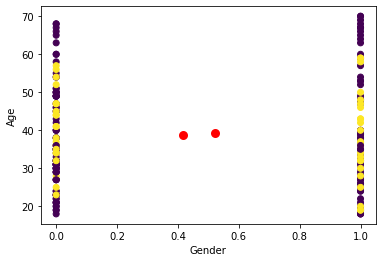

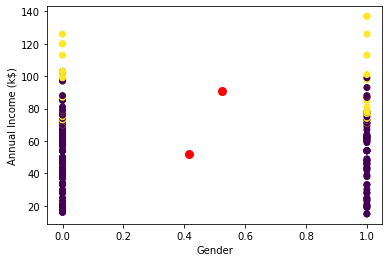

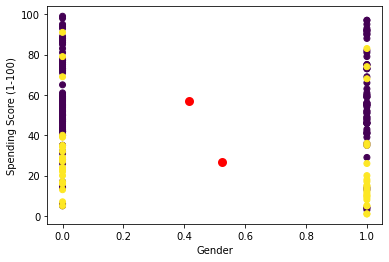

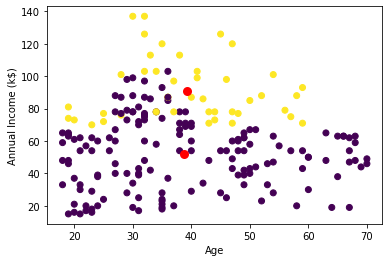

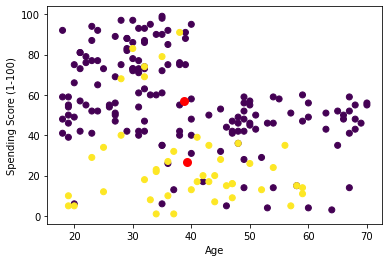

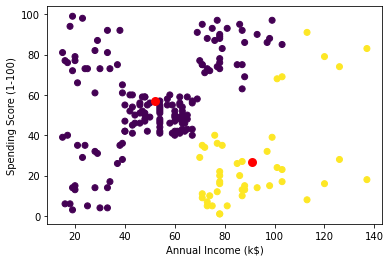

In [11]:
for x in range(NUMBER_OF_ATTRIBUTES-1):
    PARAM_X = x
    for y in range(x+1,NUMBER_OF_ATTRIBUTES):
        PARAM_Y = y
    
        plt.scatter([x[PARAM_X] for x in X],[x[PARAM_Y] for x in X],c=C)
        plt.scatter([i[0][PARAM_X] for i in mu],[i[0][PARAM_Y] for i in mu],linewidth=3,color='red', marker='o',)
        plt.xlabel(df.columns[x])
        plt.ylabel(df.columns[y])
        
        plt.show()